Recall from the previous lab assignment, you can use the provided Linear Regression module from `SKLearn` to do Linear Regression. In this lab assignment, you will learn how to implement Liner Regression from scratch. This assignment consists of two main sections. 

*   Section 1: You will derive the explicit formula of **multidimensional Linear Regression**.
*   Section 2: You will SOLVE the **multidimensional Linear Regression** problem using an iterative optimization algorithm called **"gradient descent"** which is one of the most important concepts in Machine Learning.

*This lab assignment can be considered to be heavier than the previous ones. Please plan ahead!*

**Problem:** Explore the linear relationship between the following attributes: 
1. `CIC0`
2. `SM1 Dz(Z)`
3. `GATS1i`
4. `MLOGP`
with the response value `LC50` of the [
QSAR fish toxicity Data Set](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity) dataset. For this time, you are allowed to use `SKLearn` **only for checking your implementation**.

Generally, we want to find the value of the coefficients $\alpha_{1-4}$ and the bias $\beta$ in the following formula: 
$$
LC50 = \alpha_1 CIC0 + \alpha_2 SM1 Dz(Z) + \alpha_3 GATS1i + \alpha_4 MLOGP + β
$$

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression as SKLearnLinearRegression
from numpy.linalg import norm as L2Norm
import matplotlib.animation as animation


Complete the following data loader, 

| Column| Name | 
| --- | ---| 
| 1 | CIC0 |
| 2 | SM1 Dz(Z)|
| 3 | GATS1i|
| 4 | NdsCH|
| 5 | NdssC|
| 6 | MLOGP|
| 7 | quantitative response, LC50 [-LOG(mol/L)]|

all features are saved into matrix `X`, and the response values are saved into vector `y`

In [ ]:
#Download the QSAR Fish Toxicity Data Set
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv
#Data loader
def load_QSAR_Fish_Dataset(csv_file = "qsar_fish_toxicity.csv"):
  df     = pd.read_csv(csv_file, delimiter=";")  
  #YOUR CODE HERE
  X = df.iloc[:,[0,1,2,5]].values
  y = df.iloc[:,-1].values
  return X,y

--2022-03-09 17:46:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31204 (30K) [application/x-httpd-php]
Saving to: ‘qsar_fish_toxicity.csv’

qsar_fish_toxicity. 100%[===================>]  30.47K  --.-KB/s    in 0.07s   

2022-03-09 17:46:14 (427 KB/s) - ‘qsar_fish_toxicity.csv’ saved [31204/31204]



## Section I: Using explicit formula for multidimensional linear regression
Let $\bar{\textbf{X}}$ is the enhanced version of $\textbf{X}$ by stacking $\textbf{X}$ with an all-ones vector in the last column: 
$$\bar{\textbf{X}} = \left[\bar{\textbf{X}} | \textbf{1}_{N \times 1}\right]$$
Then the linear regression can be writen as:
$$
    \text{argmin}_{\textbf{w} \in \mathbb{R}^{d+1}} \frac{1}{2} || \bar{\textbf{X}}\textbf{w} - \textbf{y}||_2^2\\
$$
Taking the derivative and set to 0, the optimal value $\textbf{w}^*$ satisfies:
$$
\nabla J(\textbf{w}^*) = \bar{\textbf{X}}^\top(\bar{\textbf{X}}\textbf{w}^* - \textbf{y}) = 0
$$
Therefore
$$
    \textbf{w}^* = (\bar{\textbf{X}}^\top \bar{\textbf{X}})^{-1}\bar{\textbf{X}}^\top \textbf{y}
$$
Note that, in this assignment:
$$
\textbf{w}^* = [\alpha_1, \alpha_2, \alpha_3, \alpha_4, \beta]^\top
$$

In [ ]:
X, y  = load_QSAR_Fish_Dataset()
Xbar=np.concatenate((X,np.ones((np.shape(X)[0],1))),axis=1)
# print(Xbar)
w_p=np.matmul(np.linalg.inv(np.matmul(Xbar.T,Xbar)),Xbar.T).dot(y)
print(w_p)



[ 0.44773266  1.22106505 -0.77439638  0.38299702  2.19351544]


##Section II: Using Gradient Descent

In [ ]:
#PROVIDED CODE, RUN THIS CELL! 
! apt-get install imagemagick #install ImageMagick Library (export to .gif file for visualization)
! clear

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [ ]:
#PROVIDED CODE, RUN THIS CELL! 
def generate_simple_2d_linear_data(m, b, noise_sigma = 2e-2):
  w_star = np.array([m, b])
  x = np.linspace(0,1)
  n = len(x)
  x = np.hstack((x[:,None], np.ones((n,1)))) 
  y = np.matmul(x, w_star) + np.random.normal(scale = 2e-2,size=(n))
  return x, y

def print_result(logs, w):
  print("[Gradient Descent] Coefficients (alpha): ",w[:-1])
  print("[Gradient Descent] Bias (beta): ", w[-1])
  plt.figure(figsize=(10,3))
  plt.plot(logs["grad_f_vals"], label = "||grad_L(w)||")
  plt.legend()
  plt.xlabel("Iterations", size=15)
  plt.ylabel("||grad_L(w)||", size=15)

def visualize_2d_lr_grad_descent(x, y, w_hist, m_range=(-1,1), b_range=(-1,1), cmap = cm.jet, 
                                 export_gif = False, out_file_name = "lr_grad_desc.gif"):
  m      = np.linspace(-1,1)
  b      = np.linspace(-1,1)
  mx, by = np.meshgrid(m,b)
  def loss_func(m, b):
    return 0.5 * ((x*m + b - y)**2).mean()
  fig  = plt.figure(figsize=(12,6))
  fig.tight_layout()
  viz_w_hist = w_hist.T
  v_loss_func = np.vectorize(loss_func, signature="(),()->()")
  loss_val = v_loss_func(mx, by)
  ax3d = fig.add_subplot(1,2,1, projection='3d')
  ax3d.plot_surface(mx, by, loss_val, cmap=cmap, linewidth=0, antialiased=False)
  axCon= fig.add_subplot(1,2,2)
  axCon.scatter(mx, by, c=loss_val, cmap=cmap, s=100)
  axCon.contour(mx, by, loss_val, 30, colors = 'white', alpha = 0.5)
  axCon.set_xlabel("m")
  axCon.set_ylabel("b")
  ax3d.set_xlabel("m")
  ax3d.set_ylabel("b")
  ax3d.set_zlabel("Loss")
  if (export_gif):
    ims = [axCon.plot(viz_w_hist[:i,0], viz_w_hist[:i,1], '-x', color = 'yellow', linewidth=2, markersize=8)
          for i in range(1, len(viz_w_hist))]
    ani = animation.ArtistAnimation(fig, ims, interval=400, blit=True, repeat_delay=500)
    ani.save(out_file_name, writer='imagemagick')
  else:
    axCon.plot(viz_w_hist[:,0], viz_w_hist[:,1], '-x', color = 'yellow', linewidth=2, markersize=8)

### II.1. Gradient Descent in 2 Dimensional Linear Regression
Before jumping to solve the multidimensional linear regression, let's start with the simplest case first. We will learn how to implement **gradient descent** to fit a line with a set of 2D points, similiar to the `height-weight` example in the previous assignment. The good thing with 2D case is that we can visualize and see have a better sense of what really happened (and also easier for you to debug!)

---

We provided a code to generate a sample dataset, a visualization function to visualize the loss function with respect to every combination of `m` (coefficient) and `b` (bias). Your task is complete the provided `TEMPLATE`, where some parts are missing.

**Step 1:** Prepare a sample 2D dataset

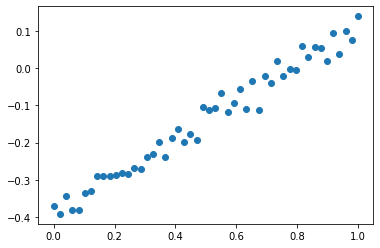

In [ ]:
X_bar, y   = generate_simple_2d_linear_data(0.5, -0.39)
#Visualize the sample dataset
plt.scatter(X_bar[:,0], y)

**Step 2:** Implement Linear Regression Using Gradient Descent

**LINEAR REGRESSION WITH GRADIENT DESCENT**
$$
    J(\textbf{w}) = \frac{1}{2N}||\bar{\textbf{X}}\textbf{w} - \textbf{y}||_2^2 \\
    \nabla J(\textbf{w}) = \frac{1}{N} \bar{\textbf{X}}^\top(\bar{\textbf{X}}\textbf{w} - \textbf{y})
$$
Gradient descent with fixed learning rate $\delta$:
$$
\textbf{w}_{k+1} = \textbf{w}_{k} - \delta.\nabla J(\textbf{w}_{k})
$$
Stopping criteria:
$$
  ||\nabla L(\textbf{w}_{k})||_2 < \epsilon
$$

---

[Gradient Descent] Coefficients (alpha):  [0.50098318]
[Gradient Descent] Bias (beta):  -0.3873430888059353


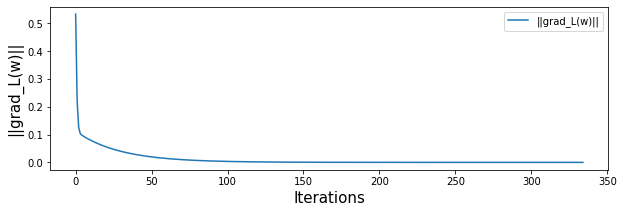

In [ ]:
def L(X,y,w):
  return 1/(2*len(X))*(L2Norm(X.dot(w)-y[:,None])**2)

def grad_L(X,y,w):
  return 1/(len(X))*(X.transpose().dot(X.dot(w)-y[:,None]))

def gradient_descent(func, grad_func, X, y, w0, lr = 1e-1, eps = 1e-6, max_iter = 10000):
    """
    Runs gradient descent with a given loss function
    :param func(X,y,w): the loss function that you want to optimize, with given input X, label y and weight w
    :param grad_func(X,y,w): the gradient of the loss function
    :param X: training set
    :param y: label of the training set
    :param w0: initial weight
    :param lr: learning rate (fixed during training)
    :param eps: epsilon for the stopping criteria
    :param max_iters: the maximum number of iterations
    :return: logs of each step (list of dictionary), and the best weight w 
    """
    k = 1
    f_vals = []
    grad_f_vals = []
    w_hist = []
    logs   = {}
    w = w0.copy()
    while True:
        grad_f_k = grad_func(X, y, w) #gradient at step k
        #Stoping criteria
        #TYPE YOUR ANSWER HERE
        if L2Norm(grad_f_k)<eps: #Replace "True" with your answer!
            return  {"f_vals": np.array(f_vals), 
                     "grad_f_vals": np.array(grad_f_vals), 
                     "w_hist": np.concatenate([w0] + w_hist, axis = -1)}, w.flatten()
        
        #Update params:
        #TYPE YOUR ANSWER HERE, replace None with your answer!
        w = w - lr * grad_f_k
        #Save logs
        f_vals.append(func(X,y,w))
        grad_f_vals.append(L2Norm(grad_f_k))
        w_hist.append(w)
        k+=1

#Load dataset:
X_bar, y   = generate_simple_2d_linear_data(0.5, -0.39)
#Weight initialization
w0 = np.array([[-0.75,0.75]]).T
#Run gradient descent
logs, w = gradient_descent(L, grad_L, X_bar, y, w0, lr = 0.5, max_iter = 60)
#Print Result
print_result(logs,w)

**Step 3:** Gradient Descent visualization 

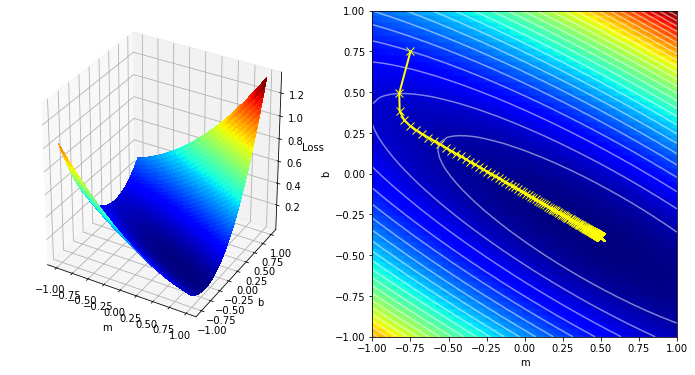

In [ ]:
#Gradient Descent visualization
visualize_2d_lr_grad_descent(X_bar[:,0],y, logs["w_hist"], export_gif = False)

**Step 4:** Playing with learning rate!

Experiment different values (`1.5`, `1.0`, `0.5`, ...) of the learning rate (`lr`) and visualize the optimization process. 

**What will happen if you select the learning rate too large or too small?**

### II.2. Multi-dimensional Linear Regression with Gradient Descent

---

Now, back to the multi-dimensional linear regression at the begining, solve for the coefficients $\alpha_{1-4}$, and $\beta$, using the `gradient_descent` function you implemented. 

Note that, in this assignment:
$$
\textbf{w}^* = [\alpha_1, \alpha_2, \alpha_3, \alpha_4, \beta]^\top
$$

You need to choose appropriate values for the `learning rate`, `epsilon` (or `max_iter`). You can random initialize the value of `w0`.

[Gradient Descent] Coefficients (alpha):  [ 0.44773681  1.22107185 -0.7743853   0.38299793]
[Gradient Descent] Bias (beta):  2.1934819665986933


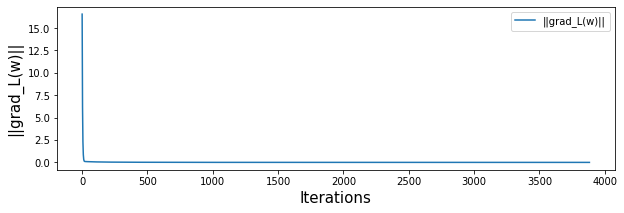

In [ ]:
#TYPE YOUR ANSWER HERE
X, y  = load_QSAR_Fish_Dataset()
Xbar=np.concatenate((X,np.ones((np.shape(X)[0],1))),axis=1)
# # # print(Xbar)
w_p=np.matmul(np.linalg.inv(np.matmul(Xbar.T,Xbar)),Xbar.T).dot(y)
# # print(w_p)

w0 = np.ones((Xbar.shape[1],1))
# # #TYPE YOUR ANSWER HERE
logs, w = gradient_descent(L, grad_L, Xbar, y, w0)

print_result(logs,w)

# X_bar = np.hstack((X, np.ones((len(X),1))))
# w0 = np.ones((X_bar.shape[1],1))
# logs, w = gradient_descent(L, grad_L, X_bar, y, w0)
# print_result(logs,w)

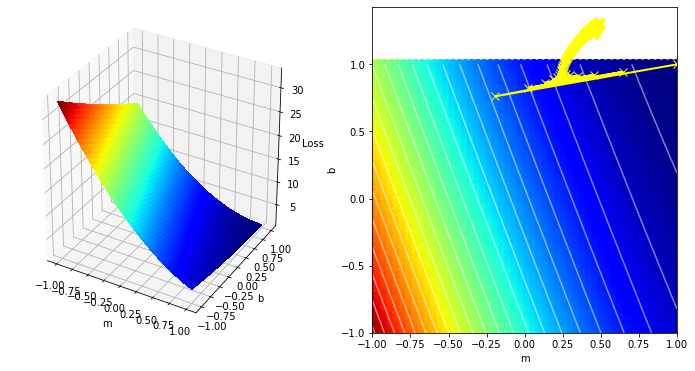

In [ ]:
visualize_2d_lr_grad_descent(Xbar[:,0],y, logs["w_hist"], export_gif = False)